In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv("S02-hw-dataset.csv")
print(df.head())
print(df.describe())
print(df.info())

   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000     0.000000
25%    10.000000   24.000000   3.000000   432.000000
50%    20.000000   33.000000   5.000000   693.000000
75%    30.000000   45.500000   7.000000  1115.000000
max    40.000000  120.000000  11.000000  2475.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null    

In [87]:
df.isna().mean()
df.dropna()
df.duplicated()
print(df.duplicated().mean)
df = df.drop(40)
df = df[df['age'] >= 18]
df = df[df['age'] < 100]
df = df[df['revenue'] > 0]
df = df[df['purchases'] >= 0]
df

<bound method Series.mean of 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool>


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511
11,12,20.0,CN,7,1652
13,14,36.0,DE,9,2358
14,15,57.0,FR,7,693


В датасете етсь отрицательные значения, то есть возвраты, пропуски. 40-ая строка - дубликат.

In [88]:
print(df['age'].value_counts())
print(df['country'].value_counts())

grouped = df.groupby('country').agg({
    'revenue': ['mean', 'sum'],
    'purchases': ['mean', 'sum']
})
print(grouped.round(2))


df['revenue_group'] = pd.cut(df['revenue'], 
                             bins=3, 
                             labels=['low', 'medium', 'high'])
df

age
24.0    2
31.0    2
52.0    2
39.0    2
32.0    2
47.0    2
35.0    2
28.0    1
25.0    1
57.0    1
36.0    1
20.0    1
22.0    1
33.0    1
42.0    1
21.0    1
54.0    1
43.0    1
55.0    1
26.0    1
23.0    1
45.0    1
51.0    1
18.0    1
34.0    1
Name: count, dtype: int64
country
FR    10
RU     9
US     6
DE     5
CN     2
Name: count, dtype: int64
         revenue       purchases    
            mean   sum      mean sum
country                             
CN       1054.00  2108      4.50   9
DE       1475.40  7377      6.60  33
FR        732.60  7326      5.20  52
RU        919.11  8272      5.22  47
US        638.17  3829      4.00  24


,user_id,age,country,purchases,revenue,revenue_group
0,1,25.0,FR,7,749,low
1,2,24.0,RU,5,1115,medium
2,3,52.0,FR,7,399,low
3,4,31.0,RU,6,654,low
7,8,28.0,CN,2,456,low
8,9,39.0,US,4,980,medium
9,10,24.0,RU,7,511,low
11,12,20.0,CN,7,1652,medium
13,14,36.0,DE,9,2358,high
14,15,57.0,FR,7,693,low


Распределение клиентов по странам: В выборке преобладают покупатели из Франции (10 чел.) и России (9 чел.), которые составляют более половины всей базы. За ними следуют США (6 чел.) и Германия (5 чел.), а Китай представлен минимально – всего 2 клиента.

Сравнение среднего чека по странам: Наибольшая средняя сумма покупок зафиксирована в Германии (1475.4), что более чем вдвое превышает показатель США (638.17). Клиенты из Китая также демонстрируют высокий средний чек (1054.0), однако ввиду малой выборки эти данные требуют осторожной интерпретации.

Ключевые наблюдения: Контраст между Германией и США при схожем числе клиентов: немецкие покупатели тратят значительно больше. Франция, лидируя по количеству клиентов, показывает средние значения по доходности. Россия сохраняет баланс между объёмом клиентской базы и средними финансовыми показателями.

Для детального анализа покупательского поведения все клиенты дополнительно распределены по трём категориям трат: низкий, средний и высокий уровень.

In [89]:
%matplotlib inline

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

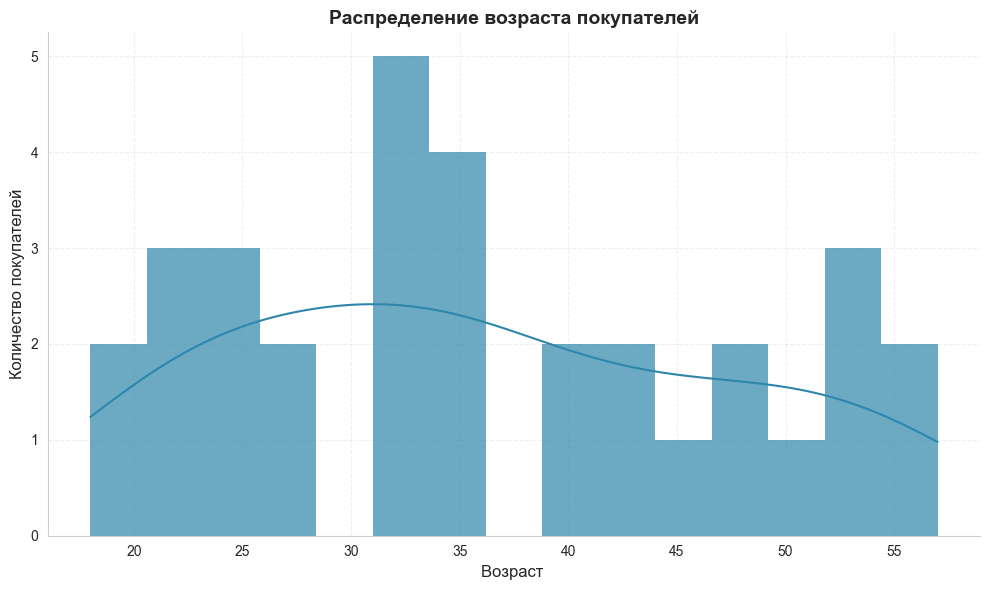

In [90]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=15, kde=True, 
             color='#2E86AB', alpha=0.7, linewidth=0)

plt.title('Распределение возраста покупателей', fontsize=14, fontweight='bold')
plt.xlabel('Возраст ', fontsize=12)
plt.ylabel('Количество покупателей', fontsize=12)

plt.grid(True, alpha=0.3, linestyle='--')
sns.despine()

plt.tight_layout()
plt.savefig('figures/age_distribution.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

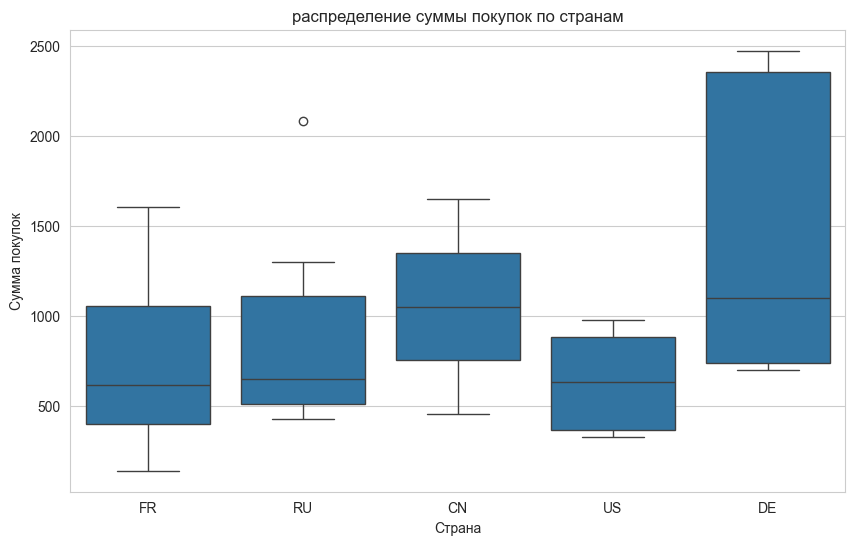

In [91]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = 'country', y = 'revenue')
plt.title('распределение суммы покупок по странам')
plt.xlabel('Страна')
plt.ylabel('Сумма покупок')
plt.show()

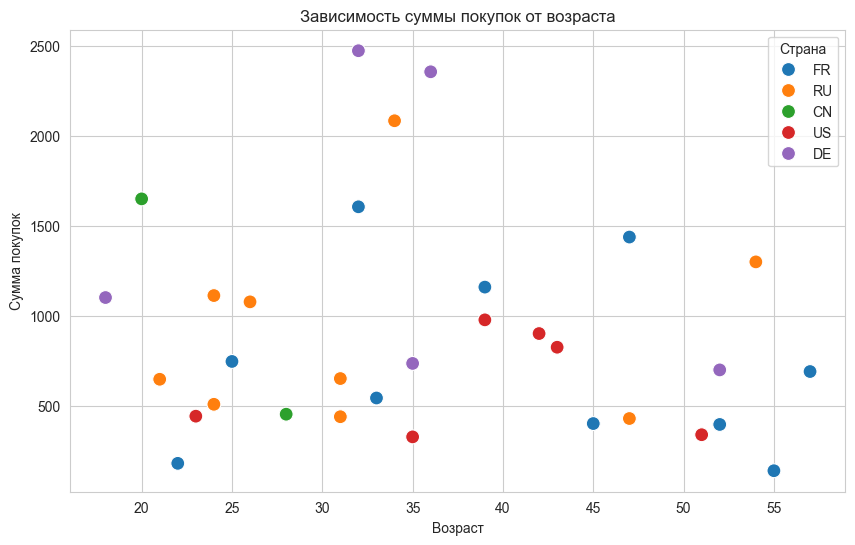

In [92]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, x = 'age', y='revenue', hue='country', s=100)
plt.title('Зависимость суммы покупок от возраста')
plt.xlabel('Возраст')
plt.ylabel('Сумма покупок')
plt.legend(title='Страна')
plt.show()

1. Географическое распределение клиентов
Франция и Россия формируют костяк клиентской базы — на эти две страны приходится более 50% всех покупателей. США и Германия представлены скромнее, а Китай находится в зачаточном состоянии присутствия, что ограничивает достоверность выводов по этому рынку.

2. Разрыв в средних чеках
Немецкие покупатели выделяются максимальной платёжеспособностью: их средний чек в 2.3 раза выше, чем у клиентов из США. Интересно, что при наибольшем числе клиентов Франция демонстрирует лишь средний уровень доходности. Россия показывает стабильные результаты, занимая промежуточную позицию между объёмом аудитории и её ценностью.

3. Вопросы для дальнейшего изучения
Данные по Китаю обнадёживают, но требуют расширения выборки. Также стоит исследовать причины столь заметного отрыва Германии от США при сопоставимом размере выборки.